# 데이터 전처리
- train_waam_cls_inst_p1.json 파일에서 'text'칼럼과 'label'칼럼만 활용
- train에서 train/val 파일로 추가 분리

In [ ]:
# import json
# from sklearn.model_selection import train_test_split

# # 1. JSON 파일 불러오기
# with open('./data/train_waam_cls_inst_p1.json', 'r', encoding='utf-8') as f:
#     data = json.load(f)

# # 2. 전처리 
# def preprocess(data):
#     processed = []
#     for item in data:
#         input_text = item.get("input", "")
#         output_labels = item.get("output", "")
#         # 'or'로 나누고 양쪽 공백 제거
#         label_list = [label.strip() for label in output_labels.split(" or ")]
#         processed.append({
#             "text": input_text,
#             "label": label_list
#         })
#     return processed

# processed_data = preprocess(data)

# # 3. train/val 분리 (10% val)
# train_data, val_data = train_test_split(processed_data, test_size=0.2, random_state=42)

# # 4. 분리된 데이터 저장
# with open('./data/bert_train_waam_cls_p1.json', 'w', encoding='utf-8') as f:
#     json.dump(train_data, f, ensure_ascii=False, indent=4)

# with open('./data/bert_val_waam_cls_p1.json', 'w', encoding='utf-8') as f:
#     json.dump(val_data, f, ensure_ascii=False, indent=4)

# print("전처리 및 train/val 분리 완료 및 저장 완료.")

In [ ]:
# import json

# # 1. JSON 파일 불러오기
# with open('./data/test_waam_cls_inst_p1.json', 'r', encoding='utf-8') as f:
#     data = json.load(f)

# # 2. 전처리 
# def preprocess(data):
#     processed = []
#     for item in data:
#         input_text = item.get("input", "")
#         output_labels = item.get("output", "")
#         # 'or'로 나누고 양쪽 공백 제거
#         label_list = [label.strip() for label in output_labels.split(" or ")]
#         processed.append({
#             "text": input_text,
#             "label": label_list
#         })
#     return processed

# processed_data = preprocess(data)

# # 3. 전처리된 데이터 저장
# with open('./data/bert_test_waam_cls_p1.json', 'w', encoding='utf-8') as f:
#     json.dump(processed_data, f, ensure_ascii=False, indent=4)

# print("전처리 완료 및 저장 완료.")


## 데이터 확인

In [9]:

import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
import numpy as np
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def analyze_dataset(json_file):
    data = load_data(json_file)
    print(f"총 데이터 수: {len(data)}")

    # 멀티라벨 조합 (정렬된 튜플로)
    label_combinations = [tuple(sorted(item['label'])) for item in data]
    combo_counts = Counter(label_combinations)

    # 출력: 멀티라벨 조합별 분포 (내림차순 정렬)
    print("\n📊 멀티라벨 조합별 분포:")
    sorted_combos = sorted(combo_counts.items(), key=lambda x: x[1], reverse=True)
    for combo, count in sorted_combos:
        print(f"{list(combo)}: {count}")

    # 시각화 : 
    combo_labels = [", ".join(combo) for combo, _ in sorted_combos]
    counts = [count for _, count in sorted_combos]

    plt.figure(figsize=(12, max(6, len(combo_labels) * 0.35)))
    sns.barplot(x=counts, y=combo_labels, palette='magma')
    plt.xlabel("Count")
    plt.ylabel("Label Combination")
    plt.title("Label Combination Distribution")
    plt.tight_layout()
    plt.show()

    # 전체 유니크 라벨 목록
    label_set = set()
    for item in data:
        for label in item['label']:
            label_set.add(label.strip())

    label_list = sorted(list(label_set))

    print(f"\n🏷️ 전체 라벨 목록 ({len(label_list)}개):")
    for i, label in enumerate(label_list, 1):
        print(f"{i:2d}. {label}")


    print(f"\n🏷️ 텍스트의 길이 분포 :")
    lengths = [len(item['text']) for item in data]
    plt.figure(figsize=(10,5))
    sns.histplot(lengths, bins=50)
    plt.title("Text Length Distribution (characters)")
    plt.xlabel("Text length")
    plt.ylabel("Count")
    plt.show()

총 데이터 수: 446

📊 멀티라벨 조합별 분포:
['Humping']: 119
['Normal']: 109
['Balling']: 84
['Balling', 'Humping']: 29
['Lack of fusion']: 28
['Bead Cut']: 13
['Bead Cut', 'Humping']: 11
['Balling', 'Bead Cut']: 11
['Balling', 'Bead Cut', 'Humping']: 11
['Balling', 'Bead Cut', 'Humping', 'Lack of fusion']: 9
['Balling', 'Humping', 'Lack of fusion']: 8
['Balling', 'Lack of fusion']: 7
['Bead Cut', 'Humping', 'Lack of fusion']: 3
['Humping', 'Lack of fusion']: 3
['Balling', 'Bead Cut', 'Lack of fusion']: 1


/tmp/ipykernel_1103112/817737117.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=combo_labels, palette='magma')


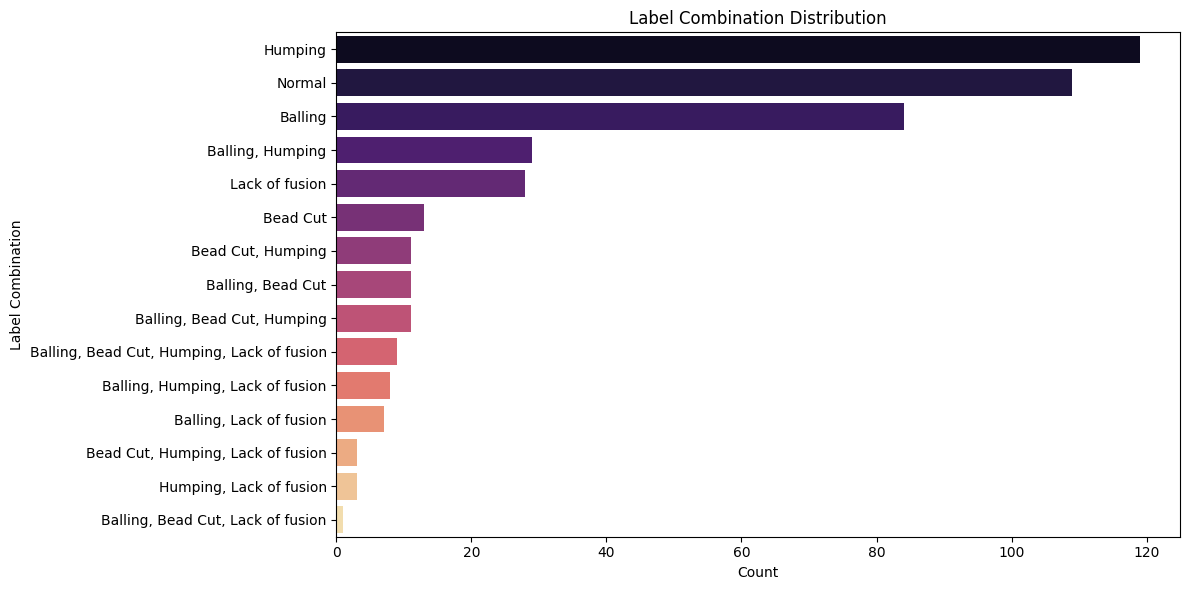


🏷️ 전체 라벨 목록 (5개):
 1. Balling
 2. Bead Cut
 3. Humping
 4. Lack of fusion
 5. Normal

🏷️ 텍스트의 길이 분포 :


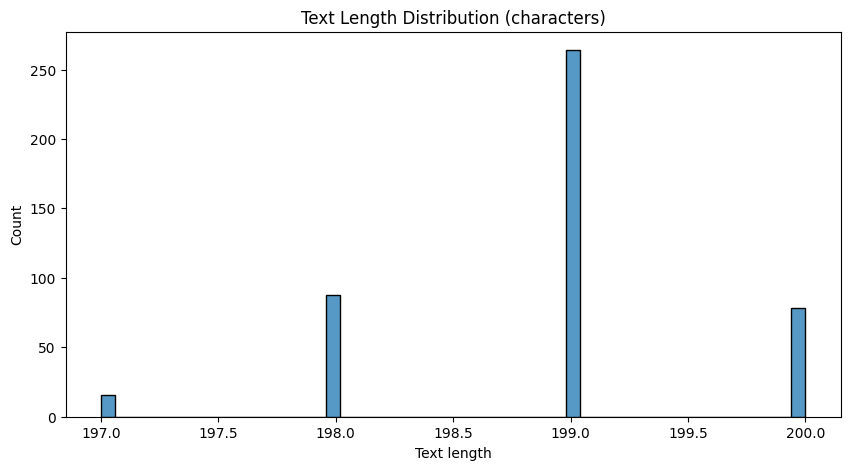

In [ ]:
analyze_dataset('./data/bert_train_waam_cls_p1.json')

총 데이터 수: 112

📊 멀티라벨 조합별 분포:
['Balling']: 31
['Humping']: 30
['Normal']: 21
['Lack of fusion']: 7
['Balling', 'Bead Cut']: 4
['Bead Cut', 'Humping']: 4
['Balling', 'Humping', 'Lack of fusion']: 4
['Balling', 'Humping']: 3
['Bead Cut']: 3
['Balling', 'Bead Cut', 'Humping']: 1
['Balling', 'Bead Cut', 'Humping', 'Lack of fusion']: 1
['Balling', 'Lack of fusion']: 1
['Balling', 'Bead Cut', 'Lack of fusion']: 1
['Humping', 'Lack of fusion']: 1


/tmp/ipykernel_1103112/817737117.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=combo_labels, palette='magma')


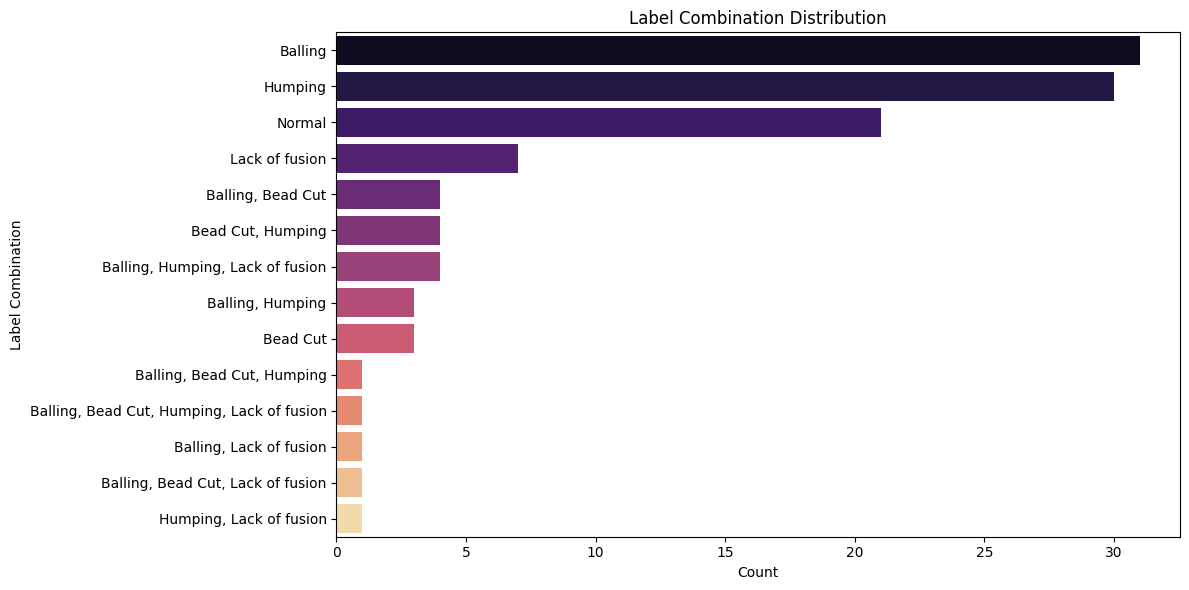


🏷️ 전체 라벨 목록 (5개):
 1. Balling
 2. Bead Cut
 3. Humping
 4. Lack of fusion
 5. Normal

🏷️ 텍스트의 길이 분포 :


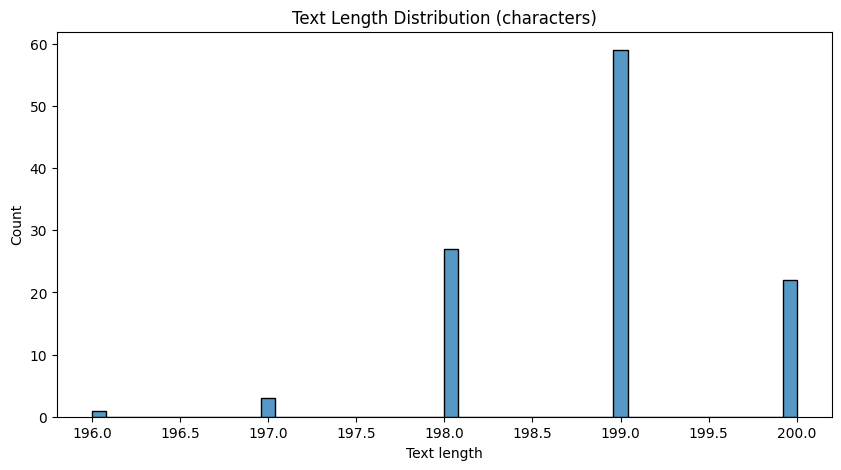

In [ ]:
analyze_dataset('./data/bert_val_waam_cls_p1.json')

총 데이터 수: 147

📊 멀티라벨 조합별 분포:
['Humping']: 38
['Normal']: 33
['Balling']: 29
['Balling', 'Humping']: 9
['Lack of fusion']: 9
['Bead Cut']: 5
['Balling', 'Humping', 'Lack of fusion']: 4
['Balling', 'Bead Cut']: 4
['Bead Cut', 'Humping']: 4
['Balling', 'Bead Cut', 'Humping']: 3
['Balling', 'Bead Cut', 'Humping', 'Lack of fusion']: 3
['Balling', 'Lack of fusion']: 2
['Humping', 'Lack of fusion']: 2
['Balling', 'Bead Cut', 'Lack of fusion']: 1
['Bead Cut', 'Humping', 'Lack of fusion']: 1


/tmp/ipykernel_1103112/817737117.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=combo_labels, palette='magma')


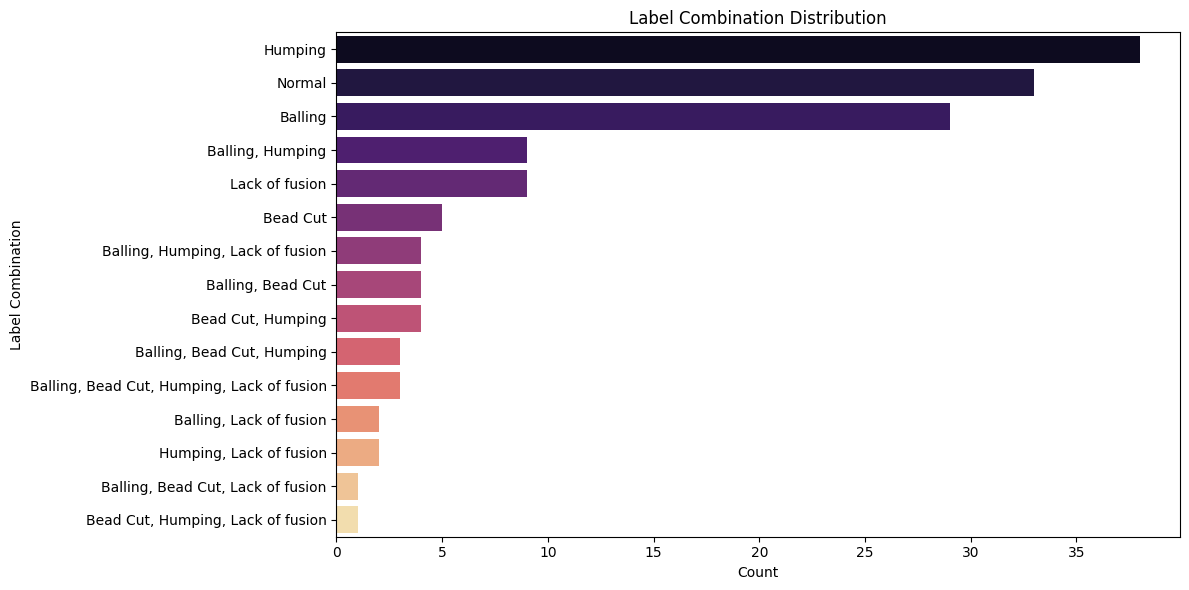


🏷️ 전체 라벨 목록 (5개):
 1. Balling
 2. Bead Cut
 3. Humping
 4. Lack of fusion
 5. Normal

🏷️ 텍스트의 길이 분포 :


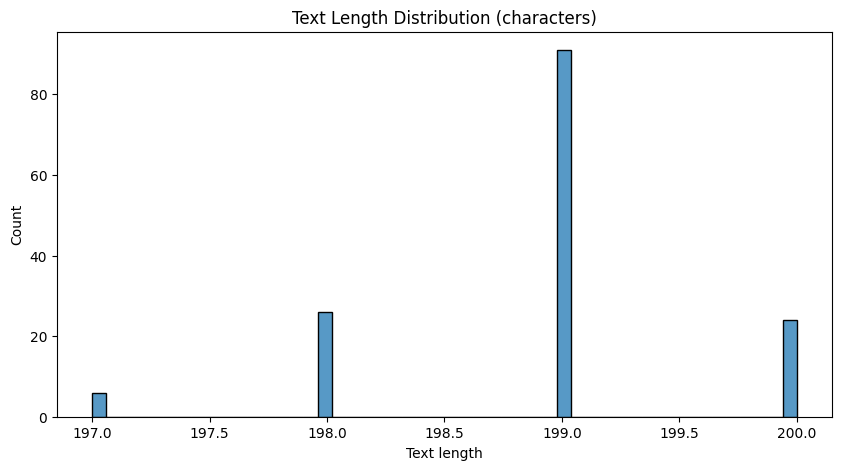

In [ ]:
analyze_dataset('./data/bert_test_waam_cls_p1.json')